In [1]:
import pandas as pd

df=pd.read_csv('ChronicKidneyDisease_EHRs.csv')
df.head()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
0,0,64,0,0,0,0,1,1,1,1,...,0,4.8,59.0,93.3,144,87,40,98,0,8
1,0,52,0,0,0,0,1,1,1,0,...,0,6.4,52.0,105.8,148,91,45,106,0,9
2,0,56,0,0,0,0,1,1,1,1,...,0,6.4,57.0,99.8,149,86,41,88,0,7
3,0,58,0,0,0,0,0,1,1,1,...,0,5.1,65.0,90.3,116,68,32,103,0,9
4,0,63,1,0,0,0,1,1,1,1,...,1,5.0,70.0,79.7,132,63,31,105,0,9


## Data Preprocessing

In [2]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Handle missing values (if any)
df.fillna(df.median(), inplace=True)

In [3]:
df.describe()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,EventCKD35,TIME_YEAR
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,...,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.509165,53.203666,0.437882,0.091650,0.059063,0.152749,0.682281,0.645621,0.505092,0.551935,...,0.446029,4.978574,67.856823,98.116090,131.374745,76.871690,30.183299,83.065173,0.114053,6.940937
std,0.500426,13.821282,0.496632,0.288825,0.235983,0.360113,0.466064,0.478812,0.500484,0.497803,...,0.497586,1.096702,17.918627,18.503267,15.692650,10.711134,6.236742,26.011140,0.318200,2.201710
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.230000,6.000000,60.000000,92.000000,41.000000,13.000000,0.000000,0.000000,0.000000
25%,0.000000,44.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,4.200000,55.000000,86.400000,121.000000,69.000000,26.000000,77.000000,0.000000,6.000000
50%,1.000000,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,5.000000,66.000000,98.100000,131.000000,77.000000,30.000000,93.000000,0.000000,8.000000
75%,1.000000,64.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.770000,78.500000,109.500000,141.000000,83.000000,33.000000,100.000000,0.000000,8.000000
max,1.000000,89.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.300000,123.000000,242.600000,180.000000,112.000000,57.000000,111.000000,1.000000,9.000000


In [4]:

# Separate features and target variable
features = df.drop('EventCKD35', axis=1)
target = df['EventCKD35']

# One-hot encode categorical variables (if any categorical features are present)
# For this dataset, all categorical features are already numerical, so we skip this step


In [5]:

# Normalize numerical features
numerical_features = features.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
features[numerical_features] = scaler.fit_transform(features[numerical_features])

# Display the preprocessed data
features.head()

,Sex,AgeBaseline,HistoryDiabetes,HistoryCHD,HistoryVascular,HistorySmoking,HistoryHTN,HistoryDLD,HistoryObesity,DLDmeds,...,HTNmeds,ACEIARB,CholesterolBaseline,CreatinineBaseline,eGFRBaseline,sBPBaseline,dBPBaseline,BMIBaseline,TimeToEventMonths,TIME_YEAR
0,-1.018501,0.781935,-0.882602,-0.317643,-0.250541,-0.424604,0.682401,0.740875,0.989868,0.901004,...,0.787694,-0.897300,-0.162995,-0.494784,-0.260549,0.805353,0.946551,1.575616,0.574756,0.481509
1,-1.018501,-0.087177,-0.882602,-0.317643,-0.250541,-0.424604,0.682401,0.740875,0.989868,-1.109873,...,0.787694,-0.897300,1.297413,-0.885838,0.415697,1.060510,1.320375,2.378135,0.882630,0.936165
2,-1.018501,0.202527,-0.882602,-0.317643,-0.250541,-0.424604,0.682401,0.740875,0.989868,0.901004,...,0.787694,-0.897300,1.297413,-0.606514,0.091099,1.124299,0.853095,1.736120,0.189913,0.026853
3,-1.018501,0.347379,-0.882602,-0.317643,-0.250541,-0.424604,-1.465413,0.740875,0.989868,0.901004,...,-1.269528,-0.897300,0.110832,-0.159596,-0.422848,-0.980741,-0.829113,0.291587,0.767177,0.936165
4,-1.018501,0.709509,1.133014,-0.317643,-0.250541,-0.424604,0.682401,0.740875,0.989868,0.901004,...,0.787694,1.114455,0.019556,0.119728,-0.996304,0.039884,-1.296393,0.131083,0.844146,0.936165


##  Exploratory Data Analysis (EDA)

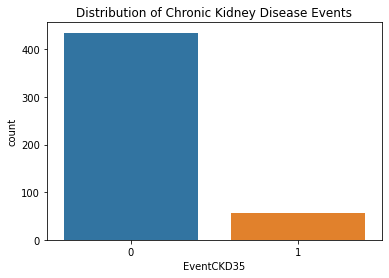

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target variable
sns.countplot(x=target)
plt.title('Distribution of Chronic Kidney Disease Events')
plt.show()

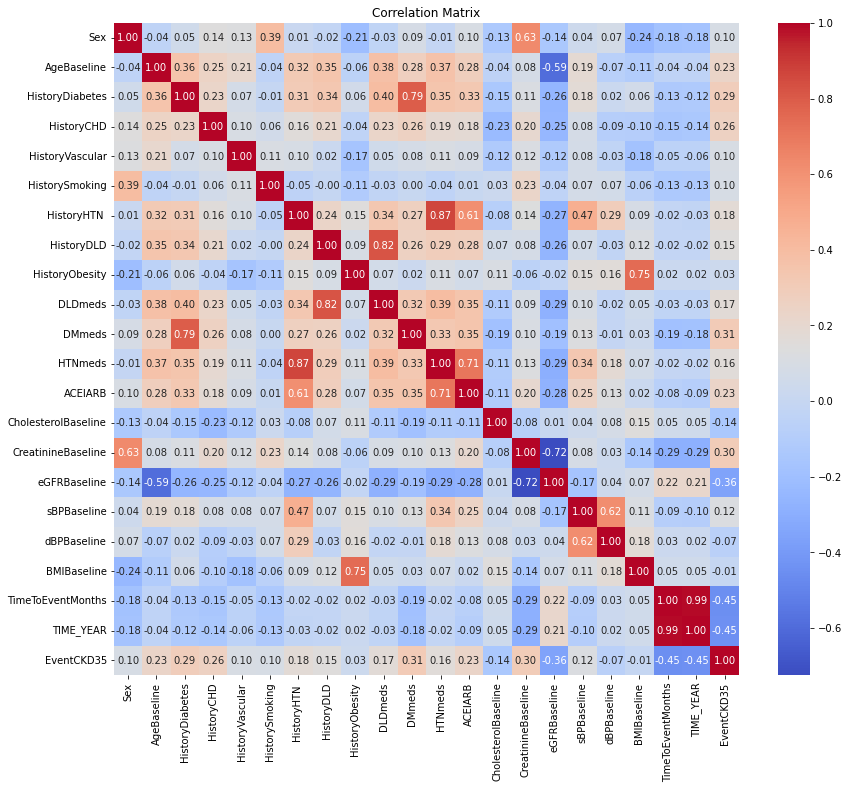

In [7]:
# Correlation matrix
corr_matrix = pd.concat([features, target], axis=1).corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Model Selection and Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Define the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

In [9]:

# Train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    print(f'--- {model_name} ---')
    print(classification_report(y_test, predictions))
    print('AUC-ROC:', roc_auc_score(y_test, predictions))
    print()

--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.92      0.99      0.96        87
           1       0.83      0.42      0.56        12

    accuracy                           0.92        99
   macro avg       0.88      0.70      0.76        99
weighted avg       0.91      0.92      0.91        99

AUC-ROC: 0.7025862068965517

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        87
           1       0.71      0.42      0.53        12

    accuracy                           0.91        99
   macro avg       0.82      0.70      0.74        99
weighted avg       0.90      0.91      0.90        99

AUC-ROC: 0.6968390804597702

--- Gradient Boosting ---
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        87
           1       0.50      0.33      0.40        12

    accuracy                           0.88     

## Improving Model Performance

In [10]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [11]:

# Train and evaluate the Random Forest model after balancing
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)
predictions = rf.predict(X_test)

print('--- Random Forest (after SMOTE) ---')
print(classification_report(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))

--- Random Forest (after SMOTE) ---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        87
           1       0.67      0.50      0.57        12

    accuracy                           0.91        99
   macro avg       0.80      0.73      0.76        99
weighted avg       0.90      0.91      0.90        99

AUC-ROC: 0.7327586206896551


In [12]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [13]:

# Grid Search for Random Forest
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train_balanced, y_train_balanced)

# Best model from Grid Search
best_rf_random = grid_search.best_estimator_

# Evaluate the best model
predictions = best_rf_random.predict(X_test)
print('--- Best Random Forest (after SMOTE and Grid Search) ---')
print(classification_report(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))

--- Best Random Forest (after SMOTE and Grid Search) ---
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        87
           1       0.67      0.50      0.57        12

    accuracy                           0.91        99
   macro avg       0.80      0.73      0.76        99
weighted avg       0.90      0.91      0.90        99

AUC-ROC: 0.7327586206896551


## Implementing Model Ensembles

In [14]:
from sklearn.ensemble import VotingClassifier

# Define individual models
log_clf = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
gb_clf = GradientBoostingClassifier(random_state=42)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rf_clf), ('gb', gb_clf)], voting='soft')

# Train and evaluate the voting classifier
voting_clf.fit(X_train_balanced, y_train_balanced)
predictions = voting_clf.predict(X_test)

print('--- Voting Classifier (after SMOTE) ---')
print(classification_report(y_test, predictions))
print('AUC-ROC:', roc_auc_score(y_test, predictions))


--- Voting Classifier (after SMOTE) ---
              precision    recall  f1-score   support

           0       0.94      0.95      0.95        87
           1       0.64      0.58      0.61        12

    accuracy                           0.91        99
   macro avg       0.79      0.77      0.78        99
weighted avg       0.91      0.91      0.91        99

AUC-ROC: 0.7686781609195403


In [ ]:
import joblib
import flask
from flask import request, jsonify

# Save the best model
joblib.dump(best_rf_random, 'best_model.pkl')

# Load the model for prediction
best_model = joblib.load('best_model.pkl')

# Create a Flask application
app = flask.Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.json
    features = pd.DataFrame(data)
    prediction = best_model.predict(features)
    return jsonify({'prediction': prediction.tolist()})

if __name__ == '__main__':
    app.run(debug=False)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
